<a href="https://colab.research.google.com/github/leo-Manish/Phython_project/blob/main/01_Website_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# 1) What patterns or trends can you observe in website sessions and users over
# time?

# 2) Which marketing channel brought the highest number of users to the website,
# and how can we use this insight to improve traffic from other sources?

# 3) Which channel has the highest average engagement time, and what does that
# tell us about user behavior and content effectiveness?

# 4) How does engagement rate vary across different traffic channels?

# 5) Which channels are driving more engaged sessions compared to non-engaged
# ones, and what strategies can improve engagement in underperforming
# channels?

# 6) At what hours of the day does each channel drive the most traffic?


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv('data-export.csv')

In [103]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


Data format data and Rename Columns!

In [104]:
df.columns=df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns=["channel group","Date_hour","Users","Sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user"	,"Events per session","Engagement rate","Event count"]
df.head()

,channel group,Date_hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


cleaning data

In [105]:
df["Date_hour"]=pd.to_datetime(df["Date_hour"],format="%Y%m%d%H")#Fix Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date_hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [106]:
df.head()

,channel group,Date_hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [107]:
numeric_columns=df.columns.drop(["channel group","Date_hour"]) # excludes the two columns.
df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric,errors="coerce")#convert all remaining columns in numeric_columns into numeric type.
df["Hour"]=df["Date_hour"].dt.hour #extracts just the hour part (0–23) from each datetime and A new column "Hour" is added to the DataFrame.
df.head()

,channel group,Date_hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [108]:
df.info()# check the Dtpye now its changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date_hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [109]:
df.describe()

,Date_hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [110]:
df.groupby("Date_hour")[["Sessions","Users"]].sum()

,Sessions,Users
Date_hour,,
2024-04-06 00:00:00,270,197
2024-04-06 01:00:00,142,107
2024-04-06 02:00:00,142,115
2024-04-06 03:00:00,122,93
2024-04-06 04:00:00,102,79
...,...,...
2024-05-03 19:00:00,324,264
2024-05-03 20:00:00,327,273
2024-05-03 21:00:00,374,315


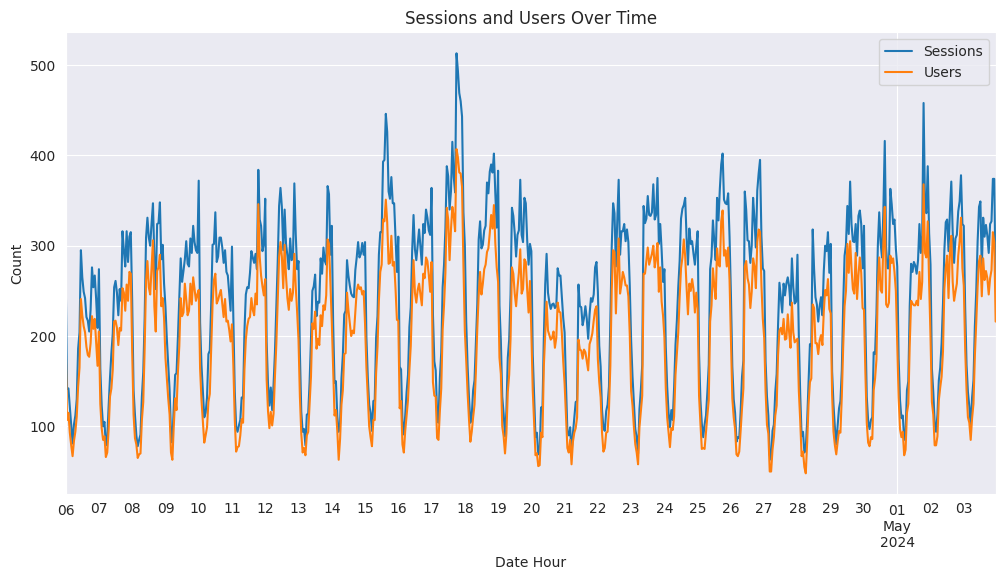

In [111]:
#  What patterns or trends can you observe in website sessions and users over time?
# visualizations-
sns.set_style("darkgrid")
# Group by Date_hour and plot Sessions + Users
df.groupby("Date_hour")[["Sessions","Users"]].sum().plot(ax=plt.gca(), figsize=(12,6))
plt.title("Sessions and Users Over Time")
plt.xlabel("Date Hour")
plt.ylabel("Count")
plt.show()

# 2) Which marketing channel brought the highest number of users to the website,
# and how can we use this insight to improve traffic from other sources?

/tmp/ipython-input-4258949966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette="viridis")


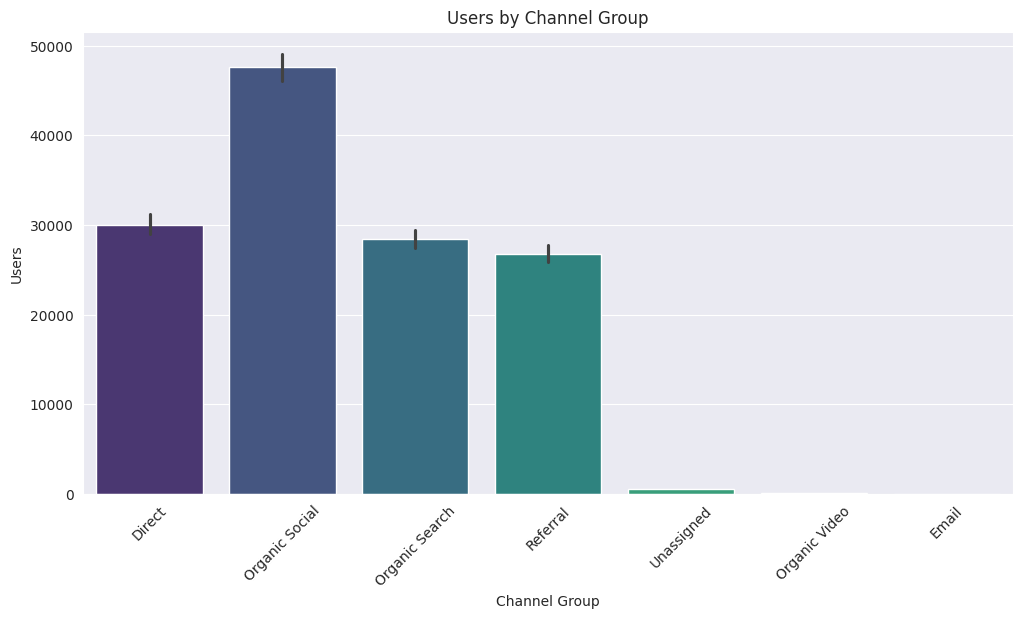

In [112]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="channel group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Users by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.show()

# 3) Which channel has the highest average engagement time, and what does that
# tell us about user behavior and content effectiveness?

In [113]:
df.head()

,channel group,Date_hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


/tmp/ipython-input-509807203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="channel group",y="Average engagement time per session",estimator=np.mean,palette="magma")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

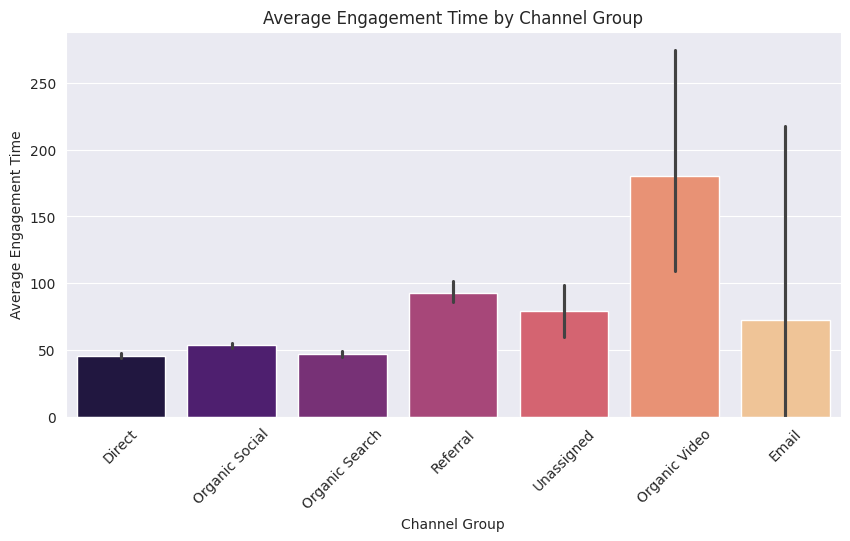

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="channel group",y="Average engagement time per session",estimator=np.mean,palette="magma")
plt.title("Average Engagement Time by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Average Engagement Time")
plt.xticks(rotation=45)

4) How does engagement rate vary across different traffic channels?

/tmp/ipython-input-1078513652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="channel group",y="Engagement rate",palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

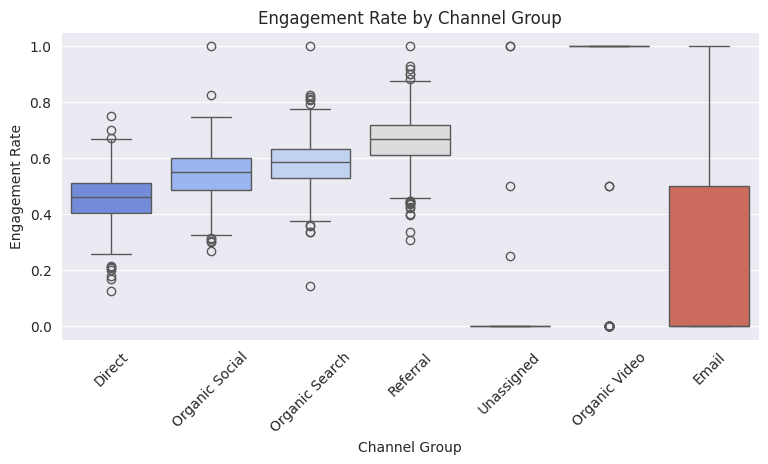

In [115]:
  plt.figure(figsize=(9,4))
  sns.boxplot(data=df,x="channel group",y="Engagement rate",palette="coolwarm")
  plt.title("Engagement Rate by Channel Group")
  plt.xlabel("Channel Group")
  plt.ylabel("Engagement Rate")
  plt.xticks(rotation=45)

5) Which channels are driving more engaged sessions compared to non-engaged
ones, and what strategies can improve engagement in underperforming channels?


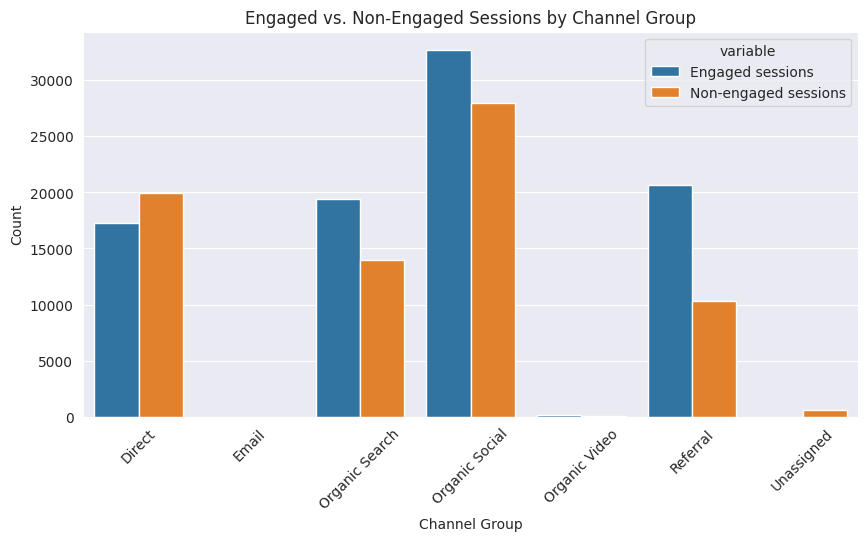

In [116]:
session_df=df.groupby("channel group")[["Sessions","Engaged sessions"]].sum().reset_index()
session_df["Non-engaged sessions"]=session_df["Sessions"]-session_df["Engaged sessions"]
session_df_melted=session_df.melt(id_vars="channel group",value_vars=["Engaged sessions","Non-engaged sessions"])
plt.figure(figsize=(10,5))
sns.barplot(data=session_df_melted,x="channel group",y="value",hue="variable")
plt.title("Engaged vs. Non-Engaged Sessions by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [117]:
df.head()

,channel group,Date_hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


At what hours of the day does each channel drive the most traffic?



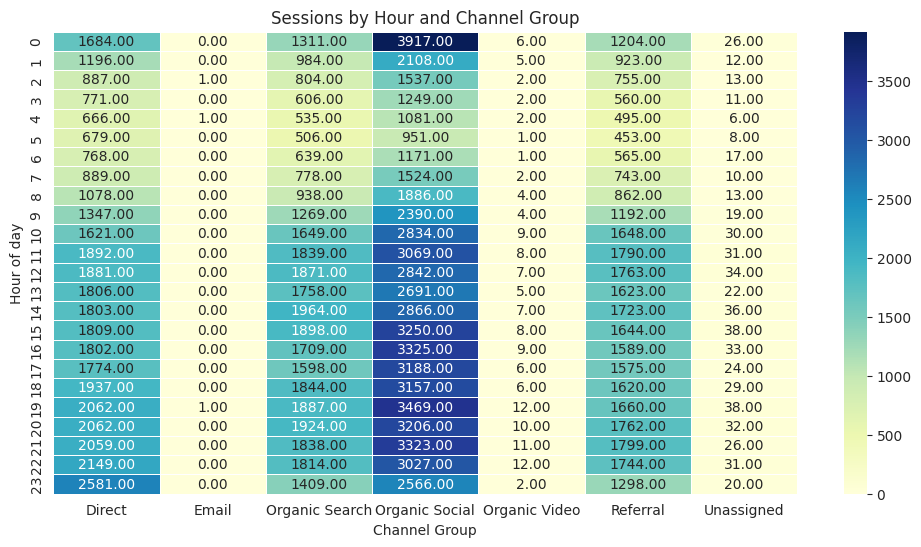

In [118]:
Haet_map=df.groupby(["Hour","channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(Haet_map,annot=True,cmap="YlGnBu" ,linewidths=.5,fmt=".2f")
plt.title("Sessions by Hour and Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Hour of day")
plt.show()